In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
df = pd.read_csv(r"C:\Users\user\Desktop\#\DA\practice\python\E - commerce\cleaned_data sets\merged_data.csv", low_memory=False)

In [4]:
# Converting all the  columns to appropriate data types
df['order_id'] = df['order_id'].astype(str)
df['customer_id'] = df['customer_id'].astype(str)
df['order_status'] = df['order_status'].astype('category')

# Convert timestamp columns to datetime
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
df['order_approved_at'] = pd.to_datetime(df['order_approved_at'])
df['order_delivered_carrier_date'] = pd.to_datetime(df['order_delivered_carrier_date'])
df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date'])
df['order_estimated_delivery_date'] = pd.to_datetime(df['order_estimated_delivery_date'])
df['shipping_limit_date'] = pd.to_datetime(df['shipping_limit_date'])

# Convert numerical columns to appropriate data types
df['price'] = df['price'].astype(float)
df['freight_value'] = df['freight_value'].astype(float)
df['product_weight_g'] = df['product_weight_g'].astype(float)
df['payment_installments'] = df['payment_installments'].astype(int)
df['payment_value'] = df['payment_value'].astype(float)

# Convert categorical columns to category data type
df['product_category_name'] = df['product_category_name'].astype('category')
df['product_category_name_eng'] = df['product_category_name_eng'].astype('category')
df['customer_city'] = df['customer_city'].astype('category')
df['customer_state'] = df['customer_state'].astype('category')
df['seller_city'] = df['seller_city'].astype('category')
df['seller_state'] = df['seller_state'].astype('category')
df['payment_type'] = df['payment_type'].astype('category')

# Convert IDs to string as they don't need to be numerical
df['customer_unique_id'] = df['customer_unique_id'].astype(str)
df['seller_id'] = df['seller_id'].astype(str)
df['product_id'] = df['product_id'].astype(str)
df['seller_zip_code_prefix'] = df['seller_zip_code_prefix'].astype(str)
df['customer_zip_code_prefix'] = df['customer_zip_code_prefix'].astype(str)

# Verify the changes
print(df.dtypes)

order_id                                 object
customer_id                              object
order_status                           category
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
order_item_id                             int64
product_id                               object
seller_id                                object
shipping_limit_date              datetime64[ns]
price                                   float64
freight_value                           float64
product_category_name                  category
product_category_name_eng              category
product_weight_g                        float64
customer_unique_id                       object
customer_zip_code_prefix                 object
customer_city                          category
customer_state                         c

# Q1. Customer Behavior and Segmentation

In [5]:
# Group by customer_unique_id and count number of purchases
loyal_customers = df.groupby('customer_unique_id').agg({
    'order_id': 'count',  # Count the number of purchases
    'payment_value': 'sum'  # Calculate total spending
}).reset_index()

# Rename columns for clarity
loyal_customers.columns = ['customer_unique_id', 'purchase_count', 'total_spent']

# Sort by purchase count or total_spent to identify loyal customers
loyal_customers_sorted = loyal_customers.sort_values(by='purchase_count', ascending=False)

# Display top 10 most loyal customers
print(loyal_customers_sorted.head(10))

                     customer_unique_id  purchase_count  total_spent
58030  9a736b248f67d166d2fbb006bcb877c3              75       556.13
42022  6fbc7cdadbb522125f4b27ae9dee4060              38       411.48
93770  f9ae226291893fda10af7965268fb7f6              35       946.47
52175  8af7ac63b2efbcbd88e5b11505e8098a              29       457.99
32600  569aa12b73b5f7edeaa6f2a01603e381              26        62.68
82369  db1af3fd6b23ac3873ef02619d548f9c              24       658.44
50192  85963fd37bfd387aa6d915d8a1065486              24      1758.88
75269  c8460e4251689ba205045f3ea17884a1              24     27935.46
31637  5419a7c9b86a43d8140e2939cd2c2f7e              24      1333.80
14015  2524dcec233c3766f2c2b22f69fd65f4              22        40.85


## Analyzing Purchase Frequency

In [6]:
# Calculate the difference in days between the first and last purchase for each customer
purchase_frequency = df.groupby('customer_unique_id').agg({
    'order_purchase_timestamp': ['min', 'max', 'count']
}).reset_index()

# Calculate the days between first and last purchase
purchase_frequency['days_between_purchases'] = (purchase_frequency['order_purchase_timestamp']['max'] - 
                                                purchase_frequency['order_purchase_timestamp']['min']).dt.days

# Calculate purchase frequency (e.g., purchases per month)
purchase_frequency['purchases_per_month'] = (purchase_frequency['order_purchase_timestamp']['count'] / 
                                             (purchase_frequency['days_between_purchases'] / 30))

# Display top 10 customers by purchase frequency
purchase_frequency.sort_values(by='purchases_per_month', ascending=False).head(10)

customer_unique_id order_purchase_timestamp  \
                                                             min   
0      0000366f3b9a7992bf8c76cfdf3221e2      2018-05-10 10:56:00   
63724  a99131aa4ede565c3792806fb9334498      2017-09-11 10:15:00   
63733  a9963a518611924f07c2c7a3ab929c6b      2017-09-16 12:32:00   
63732  a99608213523e724f7aa168995fcbd8d      2018-01-08 08:32:00   
63731  a995d70d9935a4624429e4ded23bbc73      2018-07-02 14:20:00   
63730  a993b527ac2ad305eb572843b164f305      2018-02-05 09:34:00   
63729  a992d4d854f7dced76a672b7b0e2aa4f      2018-01-23 13:11:00   
63728  a9924de6019137342b896d2700152e05      2018-04-18 18:48:00   
63727  a991e97aea32cb2adefcb9d34968c97b      2018-02-27 13:31:00   
63726  a991e5304f81b9680f274e32f47db515      2018-06-16 10:58:00   

                                days_between_purchases purchases_per_month  
                      max count                                             
0     2018-05-10 10:56:00     1                      0                 inf  
63724 2017-09-11 10:15:00     1                      0                 inf  
63733 2017-09-16 12:32:00     1                      0                 inf  
63732 2018-01-08 08:32:00     1                      0                 inf  
63731 2018-07-02 14:20:00     1                      0                 inf  
63730 2018-02-05 09:34:00     1                      0                 inf  
63729 2018-01-23 13:11:00     1                      0                 inf  
63728 2018-04-18 18:48:00     2                      0                 inf  
63727 2018-02-27 13:31:00     1                      0                 inf  
63726 2018-06-16 10:58:00     1                      0                 inf

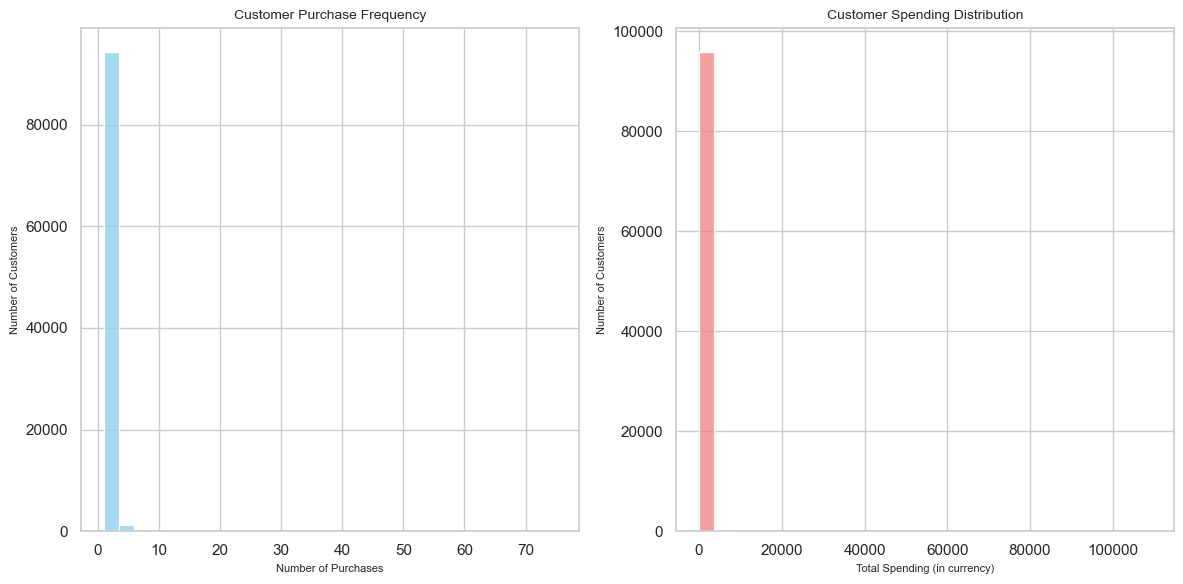

C:\Users\user\AppData\Local\Temp\ipykernel_14816\3155495021.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='payment_type', data=df, palette='muted')


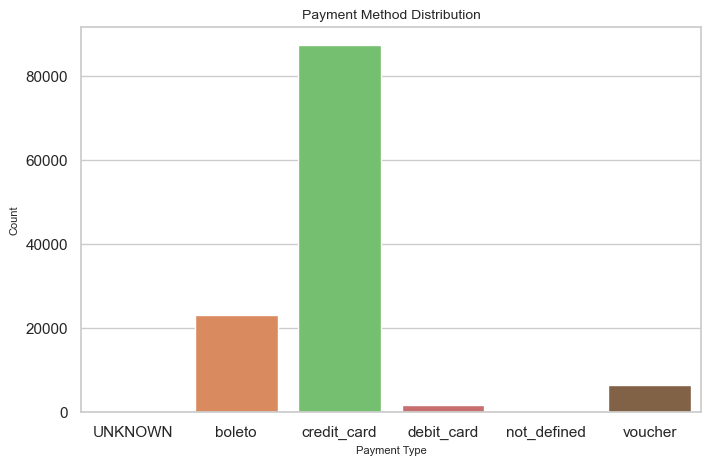

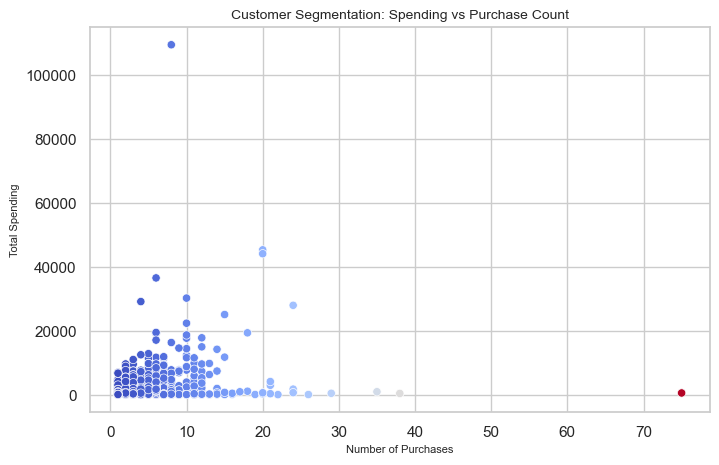

In [7]:
# Group customers by purchase behavior
customer_behavior = df.groupby('customer_unique_id').agg({
    'order_id': 'count',  # Purchase count
    'payment_value': 'sum',  # Total spending
    'order_purchase_timestamp': 'min'  # First purchase date
}).reset_index()

customer_behavior.columns = ['customer_unique_id', 'purchase_count', 'total_spent', 'first_purchase']

# Set plotting aesthetics
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# 1. **Visualizing Purchase Frequency**
plt.subplot(1, 2, 1)
sns.histplot(customer_behavior['purchase_count'], bins=30, color="skyblue")
plt.title("Customer Purchase Frequency", fontsize=10)
plt.xlabel("Number of Purchases", fontsize=8)
plt.ylabel("Number of Customers", fontsize=8)

# 2. **Visualizing Total Spending Distribution**
plt.subplot(1, 2, 2)
sns.histplot(customer_behavior['total_spent'], bins=30, color="lightcoral")
plt.title("Customer Spending Distribution", fontsize=10)
plt.xlabel("Total Spending (in currency)", fontsize=8)
plt.ylabel("Number of Customers", fontsize=8)

plt.tight_layout()
plt.show()

# 3. **Visualizing Payment Methods**
plt.figure(figsize=(8, 5))
sns.countplot(x='payment_type', data=df, palette='muted')
plt.title("Payment Method Distribution", fontsize=10)
plt.xlabel("Payment Type", fontsize=8)
plt.ylabel("Count", fontsize=8)
plt.show()

# 4. **Customer Segmentation with Scatter Plot (Total Spending vs Purchase Count)**
plt.figure(figsize=(8, 5))
sns.scatterplot(x='purchase_count', y='total_spent', data=customer_behavior, hue='purchase_count', palette='coolwarm', legend=False)
plt.title("Customer Segmentation: Spending vs Purchase Count", fontsize=10)
plt.xlabel("Number of Purchases", fontsize=8)
plt.ylabel("Total Spending", fontsize=8)
plt.show()

In [8]:
# Group customers by purchase behavior
customer_behavior = df.groupby('customer_unique_id').agg({
    'order_id': 'count',  # Purchase count
    'payment_value': 'sum',  # Total spending
    'order_purchase_timestamp': 'min'  # First purchase date
}).reset_index()

customer_behavior.columns = ['customer_unique_id', 'purchase_count', 'total_spent', 'first_purchase']

# Set directory path where you want to save the charts
save_path = r"C:\Users\user\Desktop\#\DA\practice\python\E - commerce\Question 3"

# Ensure the directory exists
if not os.path.exists(save_path):
    os.makedirs(save_path)

# Set plotting aesthetics
sns.set(style="whitegrid")

# Function to customize charts professionally
def customize_chart(ax, title):
    # Remove gridlines
    ax.grid(False)
    
    # Remove all spines
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    
    # Customize the title and axis labels
    ax.set_title(title, fontsize=10, fontweight='bold', pad=15)
    ax.set_xlabel(ax.get_xlabel(), fontsize=8)
    ax.set_ylabel(ax.get_ylabel(), fontsize=8)

# 1. **Visualizing Purchase Frequency**
plt.figure(figsize=(12, 6))
ax = plt.subplot(1, 2, 1)
sns.histplot(customer_behavior['purchase_count'], bins=30, color="skyblue", ax=ax)
customize_chart(ax, "Customer Purchase Frequency")

# 2. **Visualizing Total Spending Distribution**
ax = plt.subplot(1, 2, 2)
sns.histplot(customer_behavior['total_spent'], bins=30, color="lightcoral", ax=ax)
customize_chart(ax, "Customer Spending Distribution")

plt.tight_layout()
plt.savefig(os.path.join(save_path, "customer_purchase_and_spending.png"))
plt.close()

# 3. **Visualizing Payment Methods**
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='payment_type', data=df, palette='muted')
customize_chart(ax, "Payment Method Distribution")
plt.savefig(os.path.join(save_path, "payment_method_distribution.png"))
plt.close()

# 4. **Customer Segmentation with Scatter Plot (Total Spending vs Purchase Count)**
plt.figure(figsize=(8, 5))
ax = sns.scatterplot(x='purchase_count', y='total_spent', data=customer_behavior, hue='purchase_count', palette='coolwarm', legend=False)
customize_chart(ax, "Customer Segmentation: Spending vs Purchase Count")
plt.savefig(os.path.join(save_path, "customer_segmentation_spending_vs_purchase.png"))
plt.close()
# Files are saved in the specified directory
save_path

C:\Users\user\AppData\Local\Temp\ipykernel_14816\1583599386.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='payment_type', data=df, palette='muted')


'C:\\Users\\user\\Desktop\\#\\DA\\practice\\python\\E - commerce\\Question 3'

# 2. What’s the average order value per customer, and how does it change depending on the payment method they use?

C:\Users\user\AppData\Local\Temp\ipykernel_14816\669351254.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  payment_method_summary = df.groupby('payment_type').agg({
C:\Users\user\AppData\Local\Temp\ipykernel_14816\669351254.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='payment_type', y='average_order_value', data=payment_method_summary, palette='pastel')


Overall Average Order Value per Customer:  213.02709020146517

Average Order Value by Payment Method:
   payment_type  average_order_value
0      UNKNOWN           324.600000
1       boleto           211.862142
2  credit_card           211.829696
3   debit_card           169.476484
4  not_defined             0.000000
5      voucher           115.053774


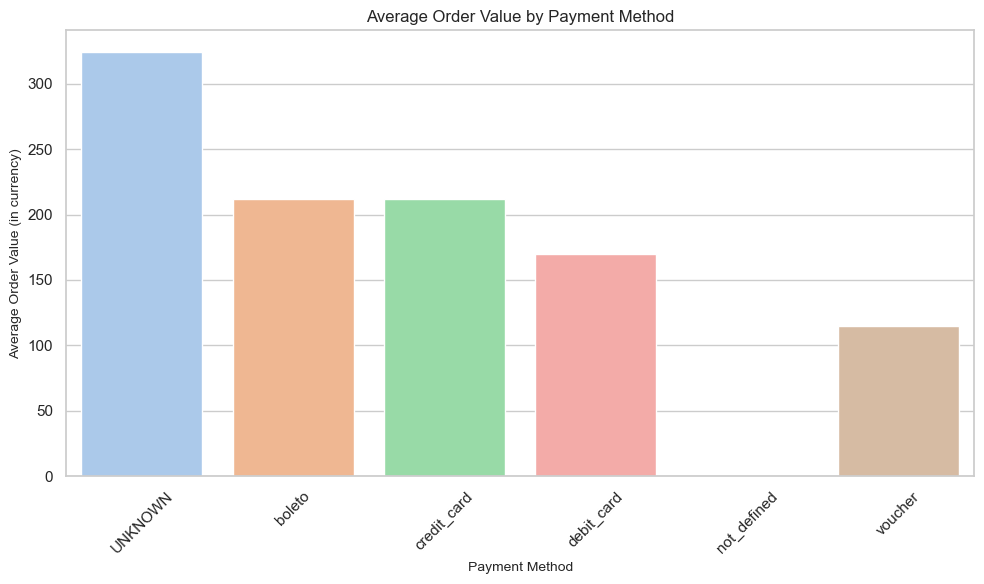

In [9]:
# Calculate total spending and number of unique customers
total_spending_per_customer = df.groupby('customer_unique_id')['payment_value'].sum().reset_index()
total_spending_per_customer.columns = ['customer_unique_id', 'total_spending']

# Calculate average order value per customer
average_order_value = total_spending_per_customer['total_spending'].mean()

# Group by payment method and calculate total spending and unique customers
payment_method_summary = df.groupby('payment_type').agg({
    'payment_value': 'sum',  # Total spending for each payment method
    'customer_unique_id': 'nunique'  # Unique customers for each payment method
}).reset_index()

# Rename columns for clarity
payment_method_summary.columns = ['payment_type', 'total_spending', 'unique_customers']

# Calculate average order value per payment method
payment_method_summary['average_order_value'] = payment_method_summary['total_spending'] / payment_method_summary['unique_customers']

# Display results
print("Overall Average Order Value per Customer: ", average_order_value)
print("\nAverage Order Value by Payment Method:\n", payment_method_summary[['payment_type', 'average_order_value']])

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x='payment_type', y='average_order_value', data=payment_method_summary, palette='pastel')
plt.title("Average Order Value by Payment Method", fontsize=12)
plt.xlabel("Payment Method", fontsize=10)
plt.ylabel("Average Order Value (in currency)", fontsize=10)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(r"C:\Users\user\Desktop\#\DA\practice\python\E - commerce\Question 3\average_order_value_by_payment_method.png")
plt.show()

In [13]:
## formatted chart
# Calculate total spending and number of unique customers
total_spending_per_customer = df.groupby('customer_unique_id')['payment_value'].sum().reset_index()
total_spending_per_customer.columns = ['customer_unique_id', 'total_spending']

# Calculate average order value per customer
average_order_value = total_spending_per_customer['total_spending'].mean()

# Group by payment method and calculate total spending and unique customers
payment_method_summary = df.groupby('payment_type').agg({
    'payment_value': 'sum',  # Total spending for each payment method
    'customer_unique_id': 'nunique'  # Unique customers for each payment method
}).reset_index()

# Rename columns for clarity
payment_method_summary.columns = ['payment_type', 'total_spending', 'unique_customers']

# Calculate average order value per payment method
payment_method_summary['average_order_value'] = payment_method_summary['total_spending'] / payment_method_summary['unique_customers']

# Display results
print("Overall Average Order Value per Customer: ", average_order_value)
print("\nAverage Order Value by Payment Method:\n", payment_method_summary[['payment_type', 'average_order_value']])

# Set the directory path where you want to save the chart
save_path = r"C:\Users\user\Desktop\#\DA\practice\python\E - commerce\Question 3"

# Ensure the directory exists
if not os.path.exists(save_path):
    os.makedirs(save_path)

# Set plotting aesthetics
sns.set(style="whitegrid")

# Function to customize charts professionally
def customize_chart(ax, title):
    # Remove gridlines
    ax.grid(False)
    
    # Remove all spines
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    
    # Customize the title and axis labels
    ax.set_title(title, fontsize=12, fontweight='bold', pad=15)
    ax.set_xlabel(ax.get_xlabel(), fontsize=10)
    ax.set_ylabel(ax.get_ylabel(), fontsize=10)

# Visualization
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='payment_type', y='average_order_value', data=payment_method_summary, palette='pastel')
customize_chart(ax, "Average Order Value by Payment Method")
plt.xticks(rotation=45)

# Save the formatted chart
plt.tight_layout()
plt.savefig(os.path.join(save_path, "average_order_value_by_payment_method.png"))
plt.close()

# Indicate where the chart has been saved
print(f"Chart has been saved to: {os.path.join(save_path, 'average_order_value_by_payment_method.png')}")

C:\Users\user\AppData\Local\Temp\ipykernel_14816\3751157427.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  payment_method_summary = df.groupby('payment_type').agg({
C:\Users\user\AppData\Local\Temp\ipykernel_14816\3751157427.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='payment_type', y='average_order_value', data=payment_method_summary, palette='pastel')


Overall Average Order Value per Customer:  213.02709020146517

Average Order Value by Payment Method:
   payment_type  average_order_value
0      UNKNOWN           324.600000
1       boleto           211.862142
2  credit_card           211.829696
3   debit_card           169.476484
4  not_defined             0.000000
5      voucher           115.053774
Chart has been saved to: C:\Users\user\Desktop\#\DA\practice\python\E - commerce\Question 3\average_order_value_by_payment_method.png


# 3.Which cities or regions are home to most of our customers?


C:\Users\user\AppData\Local\Temp\ipykernel_14816\420748855.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  city_customer_count = df.groupby('customer_city')['customer_unique_id'].nunique().reset_index()
C:\Users\user\AppData\Local\Temp\ipykernel_14816\420748855.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  state_customer_count = df.groupby('customer_state')['customer_unique_id'].nunique().reset_index()


Top 10 Cities by Customer Count:
            customer_city  customer_unique_id
0              sao paulo               14984
1         rio de janeiro                6620
2         belo horizonte                2672
3               brasilia                2069
4               curitiba                1465
5               campinas                1398
6           porto alegre                1326
7               salvador                1209
8              guarulhos                1153
9  sao bernardo do campo                 908

Top 10 States by Customer Count:
   customer_state  customer_unique_id
0             SP               40302
1             RJ               12384
2             MG               11259
3             RS                5277
4             PR                4882
5             SC                3534
6             BA                3277
7             DF                2075
8             ES                1964
9             GO                1952


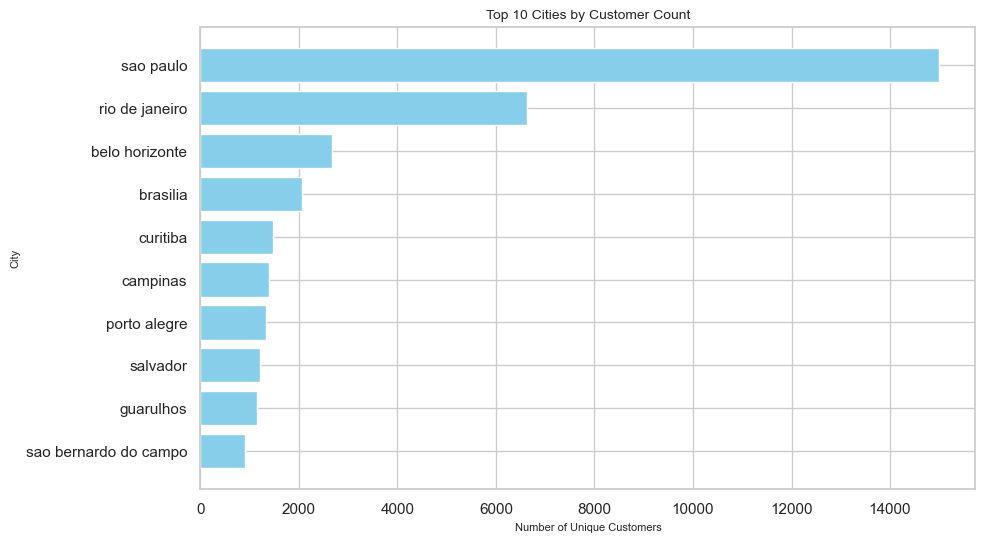

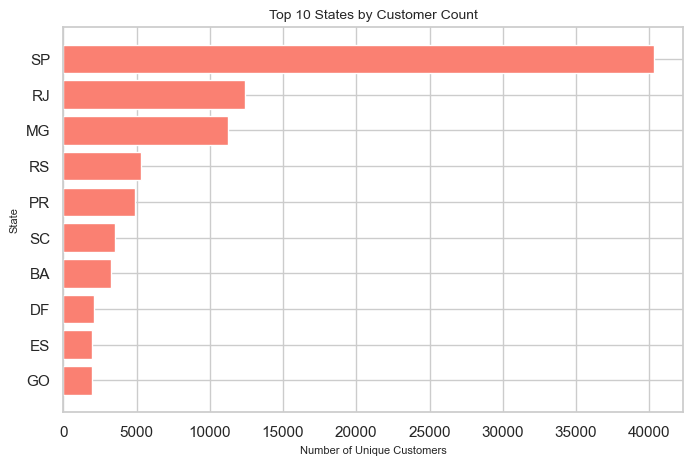

In [17]:
# Group by city and state, counting unique customers
city_customer_count = df.groupby('customer_city')['customer_unique_id'].nunique().reset_index()
state_customer_count = df.groupby('customer_state')['customer_unique_id'].nunique().reset_index()

# Sort the results in descending order
city_customer_count = city_customer_count.sort_values(by='customer_unique_id', ascending=False).reset_index(drop=True)
state_customer_count = state_customer_count.sort_values(by='customer_unique_id', ascending=False).reset_index(drop=True)

# Display top 10 cities and states with the most customers
print("Top 10 Cities by Customer Count:\n", city_customer_count.head(10))
print("\nTop 10 States by Customer Count:\n", state_customer_count.head(10))

# Import Matplotlib for plotting
import matplotlib.pyplot as plt

# Plotting the top 10 cities by customer count
plt.figure(figsize=(10, 6))
plt.barh(city_customer_count['customer_city'].head(10), city_customer_count['customer_unique_id'].head(10), color='skyblue')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.title('Top 10 Cities by Customer Count', fontsize=10)
plt.xlabel('Number of Unique Customers', fontsize=8)
plt.ylabel('City', fontsize=8)
plt.show()

# Plotting the top 10 states by customer count
plt.figure(figsize=(8, 5))
plt.barh(state_customer_count['customer_state'].head(10), state_customer_count['customer_unique_id'].head(10), color='salmon')
plt.gca().invert_yaxis()
plt.title('Top 10 States by Customer Count', fontsize=10)
plt.xlabel('Number of Unique Customers', fontsize=8)
plt.ylabel('State', fontsize=8)
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_14816\4207302978.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  city_customer_count = df.groupby('customer_city')['customer_unique_id'].nunique().reset_index()
C:\Users\user\AppData\Local\Temp\ipykernel_14816\4207302978.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  state_customer_count = df.groupby('customer_state')['customer_unique_id'].nunique().reset_index()


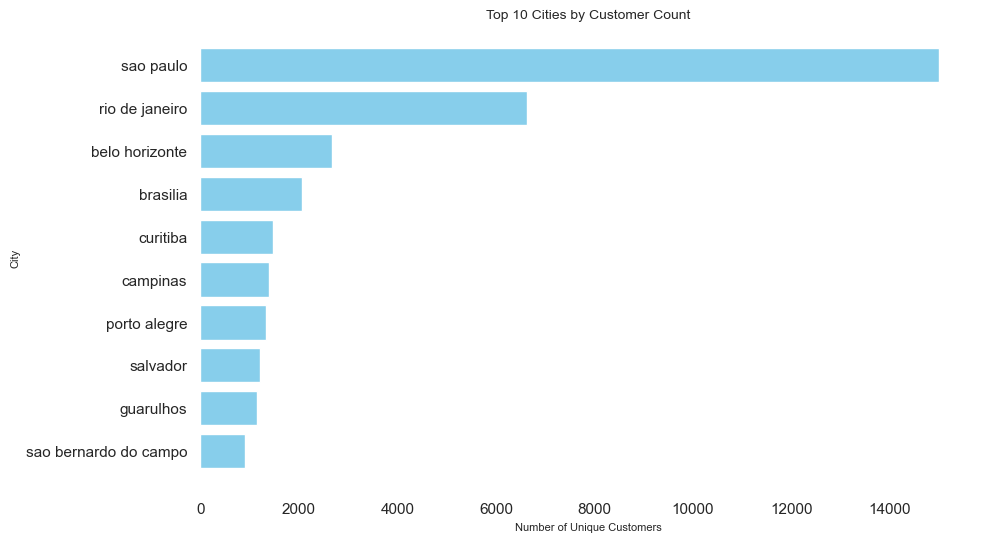

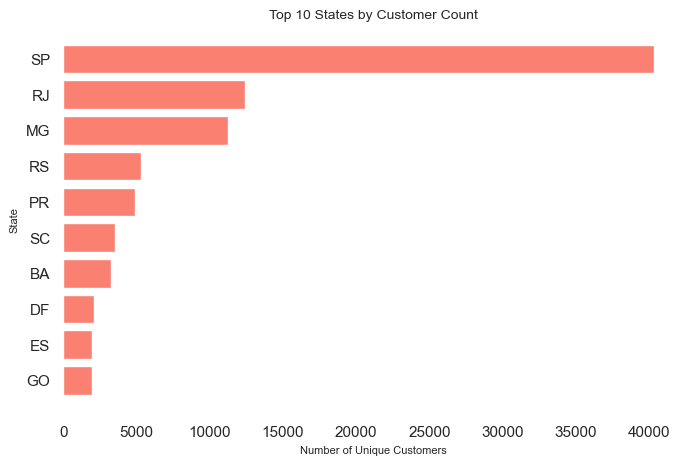

In [18]:
# Group by city and state, counting unique customers
city_customer_count = df.groupby('customer_city')['customer_unique_id'].nunique().reset_index()
state_customer_count = df.groupby('customer_state')['customer_unique_id'].nunique().reset_index()

# Sort the results in descending order
city_customer_count = city_customer_count.sort_values(by='customer_unique_id', ascending=False).reset_index(drop=True)
state_customer_count = state_customer_count.sort_values(by='customer_unique_id', ascending=False).reset_index(drop=True)

# Function to remove spines and gridlines for cleaner charts
def format_chart(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.grid(False)

# Create and save top 10 cities chart
fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(city_customer_count['customer_city'].head(10), city_customer_count['customer_unique_id'].head(10), color='skyblue')
ax.invert_yaxis()
ax.set_title('Top 10 Cities by Customer Count', fontsize=10)
ax.set_xlabel('Number of Unique Customers', fontsize=8)
ax.set_ylabel('City', fontsize=8)

# Format chart and save it
format_chart(ax)
plt.savefig('top_10_cities.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

# Create and save top 10 states chart
fig, ax = plt.subplots(figsize=(8, 5))
ax.barh(state_customer_count['customer_state'].head(10), state_customer_count['customer_unique_id'].head(10), color='salmon')
ax.invert_yaxis()
ax.set_title('Top 10 States by Customer Count', fontsize=10)
ax.set_xlabel('Number of Unique Customers', fontsize=8)
ax.set_ylabel('State', fontsize=8)

# Format chart and save it
format_chart(ax)
plt.savefig('top_10_states.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

# 4. What product categories are the most popular in different regions?

C:\Users\user\AppData\Local\Temp\ipykernel_14816\305875303.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  category_region = df.groupby(['customer_state', 'product_category_name_eng'])['order_id'].count().reset_index()
C:\Users\user\AppData\Local\Temp\ipykernel_14816\305875303.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_categories_by_state = category_region.groupby('customer_state').head(1).reset_index(drop=True)


Most Popular Product Categories by State:
    customer_state product_category_name_eng  order_count
0              AC           furniture_decor           12
1              AL             health_beauty           66
2              AM             health_beauty           21
3              AP     computers_accessories           10
4              BA             health_beauty          394
5              CE             health_beauty          174
6              DF             health_beauty          252
7              ES            bed_bath_table          240
8              GO            bed_bath_table          246
9              MA             health_beauty           91
10             MG            bed_bath_table         1403
11             MS            sports_leisure           82
12             MT             health_beauty           92
13             PA             health_beauty          108
14             PB             health_beauty           84
15             PE             health_beauty  

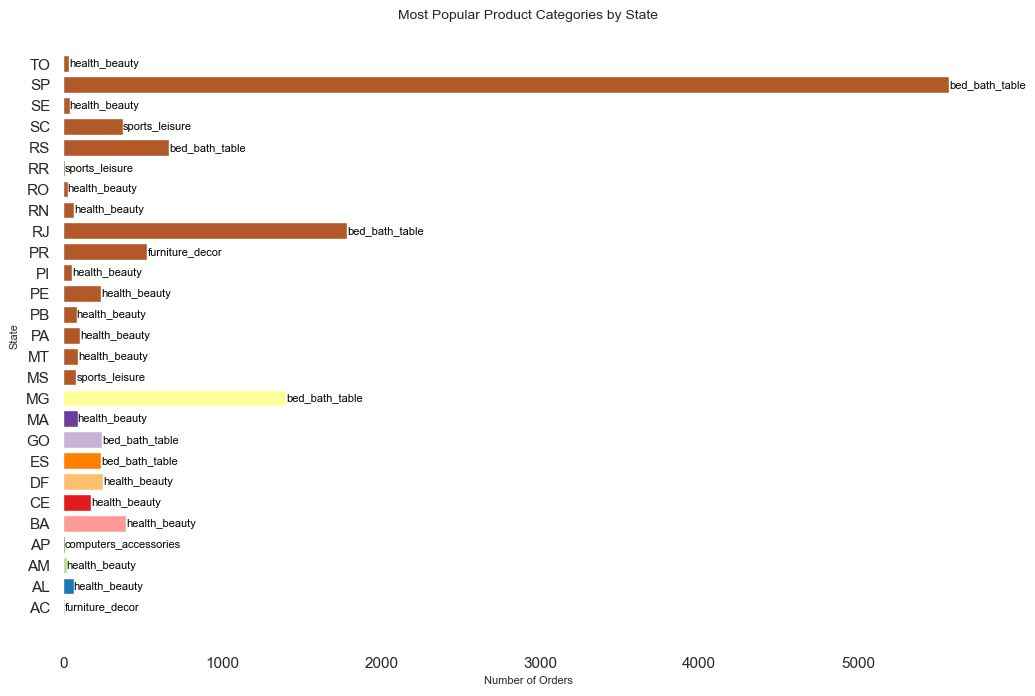

In [19]:
# Group data by 'customer_state' and 'product_category_name_eng', counting the number of occurrences
category_region = df.groupby(['customer_state', 'product_category_name_eng'])['order_id'].count().reset_index()
category_region = category_region.rename(columns={'order_id': 'order_count'})

# Sort within each state to find the most popular product category
category_region = category_region.sort_values(['customer_state', 'order_count'], ascending=[True, False])
top_categories_by_state = category_region.groupby('customer_state').head(1).reset_index(drop=True)

# Display the most popular product categories in each state
print("Most Popular Product Categories by State:\n", top_categories_by_state)

# Plotting the results
fig, ax = plt.subplots(figsize=(12, 8))
colors = plt.cm.Paired(range(len(top_categories_by_state)))

# Create a horizontal bar chart
ax.barh(top_categories_by_state['customer_state'], top_categories_by_state['order_count'], color=colors)

# Add labels and titles
ax.set_title('Most Popular Product Categories by State', fontsize=10)
ax.set_xlabel('Number of Orders', fontsize=8)
ax.set_ylabel('State', fontsize=8)

# Annotate the bars with product category names
for index, row in top_categories_by_state.iterrows():
    ax.text(row['order_count'], index, f"{row['product_category_name_eng']}", 
            va='center', fontsize=8, color='black')

# Professional chart formatting: Removing spines and gridlines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.grid(False)

# Save the chart as PNG
plt.savefig('most_popular_product_categories_by_state.png', format='png', dpi=300, bbox_inches='tight')
plt.show()
